In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.io as scp

In [22]:
vehid = pd.read_csv('../data/trajectory/vehid.csv')
vehid = vehid[vehid.columns[1:]]
vehid.head()

,0
0,2670
1,1899
2,2460
3,2817
4,2782


In [23]:
T = pd.read_csv('../data/trajectory/T.csv')
T = T[T.columns[1:]]
T.head()

,0
0,7371.0
1,9232.0
2,10629.0
3,7909.0
4,7625.0


In [24]:
T.shape

(1505756, 1)

In [25]:
dsID = pd.read_csv('../data/trajectory/dsID.csv')
dsID = dsID[dsID.columns[1:]]
dsID.head()

,0
0,5
1,3
2,6
3,4
4,4


In [26]:
dsID.shape

(1505756, 1)

In [7]:
pred_x = pd.read_csv('../data/trajectory/pred_x.csv')


In [8]:
pred_x = pred_x[pred_x.columns[1:]]

In [9]:
pred_x.shape # 5 step predictions, prediction steps

(5, 1505756)

In [156]:
pred_x.head() # vertical, should determine which lane it is

,0,1,2,3,4,5,6,7,8,9,...,1505746,1505747,1505748,1505749,1505750,1505751,1505752,1505753,1505754,1505755
0,-0.011426,0.051764,0.005410,-0.361484,0.148440,0.005435,0.038146,0.021313,0.039970,-0.008649,...,0.016876,0.003393,-0.012642,-0.045725,0.054723,-0.070206,0.018321,-0.155747,0.010516,0.056207
1,-0.016696,0.081036,0.009156,-0.665582,0.234947,0.016462,0.087279,0.059263,0.051562,-0.009509,...,0.025901,0.005016,-0.001109,-0.060452,0.105080,-0.170788,0.021381,-0.272609,0.000410,0.119322
2,-0.029695,0.116328,0.005247,-0.980765,0.317430,0.034006,0.094174,0.097722,0.078121,-0.018365,...,0.037302,0.002268,0.000721,-0.081429,0.158801,-0.238990,0.043772,-0.415257,0.010401,0.170020
3,-0.050146,0.133459,-0.007483,-1.282571,0.367599,0.034080,0.096602,0.115082,0.092257,-0.027992,...,0.050660,0.004586,0.003728,-0.080184,0.211385,-0.308657,0.057979,-0.554968,0.017736,0.220401
4,-0.063692,0.149676,-0.015425,-1.559144,0.442813,0.043054,0.070628,0.124757,0.104999,-0.038103,...,0.056801,0.002054,0.001599,-0.086793,0.245646,-0.331111,0.063932,-0.684553,0.022212,0.262988


In [10]:
pred_y = pd.read_csv('../data/trajectory/pred_y.csv')
pred_y = pred_y[pred_y.columns[1:]]
pred_y.shape

(5, 1505756)

In [157]:
pred_y.head()

,0,1,2,3,4,5,6,7,8,9,...,1505746,1505747,1505748,1505749,1505750,1505751,1505752,1505753,1505754,1505755
0,1.014351,5.975965,1.387244,3.080959,2.741180,5.035665,3.472808,5.964358,1.280862,0.002282,...,0.678711,0.653487,5.985386,5.945204,2.685196,8.507308,3.002614,1.372096,1.071995,6.024265
1,2.107006,11.935427,2.821103,6.164186,5.470873,10.142852,6.845045,11.878707,2.640875,0.227659,...,1.280465,1.230721,11.968934,11.870271,5.439539,16.982128,6.122977,2.774564,2.150619,12.091729
2,3.294621,17.801281,4.315240,9.225512,8.067076,15.283592,10.129155,17.667088,4.055852,0.446210,...,1.924555,1.858797,17.864868,17.715477,8.273271,25.397438,9.404112,4.212639,3.232811,18.126244
3,4.654342,23.684998,5.951825,12.332330,10.722377,20.475613,13.206424,23.416477,5.560373,0.705267,...,2.547420,2.487919,23.761100,23.568241,11.107809,33.676334,12.729362,5.688829,4.326011,24.188423
4,6.144602,29.701000,7.681888,15.442189,13.266392,25.830960,16.236872,29.131897,7.126894,0.969329,...,3.176722,3.210361,29.693531,29.417260,14.012662,41.881733,16.166870,7.140202,5.419085,30.350960


In [11]:
ts_cen = pd.read_csv('../data/trajectory/ts_cen.csv')
ts_cen = ts_cen[ts_cen.columns[1:]]
ts_cen.shape

(1505756, 17)

In [18]:
ts_cen['dsID'] = dsID

In [170]:
ts_cen_ave = ts_cen.groupby(['dsID']).mean().reset_index(drop = True)
#ts_cen_ave = np.round(ts_cen_ave, 2)
ts_cen_ave

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,0.000669,0.000417,0.000653,0.000517,0.000574,0.000682,0.000834,0.000982,0.001752,0.001671,0.003885,0.005680,0.009274,0.017697,0.045635,0.909078
1,0.000694,0.000355,0.000472,0.000583,0.000673,0.000802,0.000889,0.000946,0.001039,0.001230,0.001577,0.002290,0.004119,0.011270,0.034866,0.938195
2,0.000669,0.000354,0.000519,0.000567,0.000638,0.000766,0.000851,0.000933,0.001103,0.001258,0.001798,0.002641,0.004618,0.011653,0.034640,0.936992
3,0.001043,0.000890,0.001418,0.001084,0.001089,0.001197,0.001376,0.001609,0.002083,0.002501,0.003526,0.005100,0.008501,0.017766,0.051923,0.898894
4,0.000394,0.000449,0.001096,0.000429,0.000410,0.000464,0.000607,0.000750,0.001648,0.001415,0.003940,0.005856,0.009384,0.015499,0.033738,0.923920
5,0.000372,0.000421,0.001238,0.000436,0.000401,0.000434,0.000594,0.000751,0.001926,0.001458,0.004992,0.007313,0.011970,0.019183,0.041321,0.907192


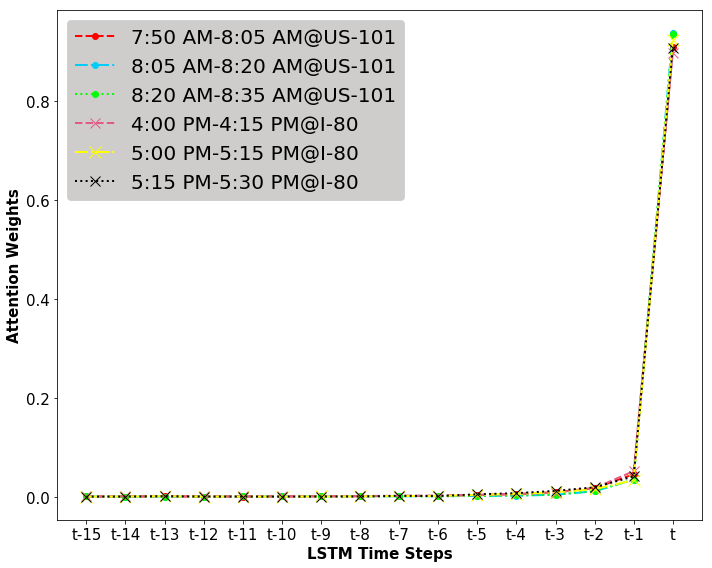

In [187]:
fig, axs = plt.subplots(1,1,figsize=(10,8)) #axs.set_facecolor('#C2C1C0') #objects = ('0 - 1', '1 - 2', '2 - 3', '3 - 4', '4 - 5')#, '5 - 6','6 - 7') x_pos = [0, 2.5, 5, 7.5, 10, 12.5, 15] plt.plot(x_pos[0:5], edge_15['weight'], color = '#DD8CFF', linestyle = '-', marker = 'o',linewidth=2.0, label = "Community 1") #plt.xticks(x_pos, objects)
x = [i + 0.5 for i in range(16)]

objects = ('t-15', 't-14', 't-13', 't-12', 't-11', 't-10', 't-9', 't-8', 't-7', 't-6', 't-5', 't-4', 't-3', 't-2', 't-1', 't')

plt.plot(x, ts_cen_ave.iloc[0, :].values, color = '#FF0000', linestyle = '--', marker = 'o', linewidth=2.0, label = "7:50 AM-8:05 AM@US-101") 
#axs.set_xlim([0, 20])
plt.xticks(x, objects)

#objects = ('0 - 1', '1 - 2', '2 - 3', '3 - 4', '4 - 5', '5 - 6')#,'6 - 7') #x_pos = [0, 2.5, 5, 7.5, 10]#12.5, 15 
plt.plot(x, ts_cen_ave.iloc[1, :].values, color = '#00CDF9', linestyle = '-.', marker = 'o',linewidth=2.0, label = "8:05 AM-8:20 AM@US-101") #plt.xticks(x_pos, objects)

#objects = ('0 - 1', '1 - 2', '2 - 3', '3 - 4', '4 - 5')#, '5 - 6','6 - 7') #x_pos = [0, 2.5, 5, 7.5, 10]#12.5, 15 
plt.plot(x, ts_cen_ave.iloc[2, :].values, color = '#03FD04', linestyle = ':', marker = 'o', linewidth=2.0, label = "8:20 AM-8:35 AM@US-101") #plt.xticks(x_pos, objects)

#objects = ('0 - 1', '1 - 2', '2 - 3', '3 - 4', '4 - 5')#, '5 - 6','6 - 7') #x_pos = [0, 2.5, 5, 7.5]#12.5, 15 plt.plot(x_pos[0:4], edge_6['weight'], color = '#F28827', linestyle = '-', marker = 'x',markersize=10, linewidth=2.0, label = "Community 5") #plt.xticks(x_pos, objects)

#x_pos = [0, 2.5, 5, 7.5, 10, 12.5]#12.5, 15 
plt.plot(x, ts_cen_ave.iloc[3, :].values, color = '#E15B86', linestyle = '--', marker = 'x', markersize=10, linewidth=2.0, label = "4:00 PM-4:15 PM@I-80")

#x_pos = [0, 2.5, 5]#12.5, 15 
plt.plot(x, ts_cen_ave.iloc[4, :].values, color = '#FFFF00', linestyle = '-.', marker = 'x', markersize=12, linewidth=2.0, label = "5:00 PM-5:15 PM@I-80")

#x_pos = [0, 2.5, 5, 7.5]#12.5, 15 
plt.plot(x, ts_cen_ave.iloc[5, :].values, color = '#000000', linestyle = ':', marker = 'x',markersize=10, linewidth=2.0, label = "5:15 PM-5:30 PM@I-80")


legend = plt.legend(fontsize = 20) 
legend.get_frame().set_facecolor('#C2C1C0')

plt.ylabel('Attention Weights',fontsize=15, weight = 'bold') #plt.yticks(y_pos,['10', '20', '30', '40', '50']) #plt.title('Bike Sharing Demand by Trip Distances', fontsize=18) 
plt.xlabel('LSTM Time Steps',fontsize=15, weight = 'bold') 
plt.xticks(fontsize=15, rotation=0) 
plt.yticks(fontsize=15)

fig.tight_layout() #plt.show() plt.savefig('ave_normalized_edge_weight_vs_dist.png', bbox_inches='tight')

In [13]:
ts_nbr = pd.read_csv('../data/trajectory/ts_nbr.csv')
ts_nbr = ts_nbr[ts_nbr.columns[1:]]
ts_nbr.shape

(10857813, 16)

In [14]:
ts_nbr.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,0.008443,0.008126,0.002377,0.000646,0.001476,0.004935,0.004466,0.006168,0.018644,0.041409,0.079069,0.122645,0.156210,0.175299,0.184008,0.186079
1,0.043313,0.077229,0.048704,0.046031,0.051483,0.052881,0.057192,0.058699,0.062092,0.064410,0.067359,0.069773,0.072242,0.074371,0.076303,0.077921
2,0.004188,0.000030,0.000175,0.000106,0.000108,0.000160,0.000573,0.003669,0.013645,0.023682,0.038940,0.069151,0.108828,0.127017,0.182511,0.427216
3,0.000287,0.001131,0.004813,0.011944,0.002584,0.007804,0.016584,0.018489,0.018791,0.025110,0.031923,0.042131,0.067337,0.132567,0.244169,0.374337
4,0.244338,0.033736,0.045136,0.044699,0.045277,0.046120,0.047247,0.048664,0.050329,0.052122,0.054034,0.055917,0.057359,0.058341,0.058617,0.058064


In [14]:
wt_ha = pd.read_csv('../data/trajectory/wt_ha.csv')
wt_ha.shape

(1505756, 41)

In [15]:
wt_ha = wt_ha[wt_ha.columns[1:]]
wt_ha.head()

,0,1,2,3,4,5,6,7,8,9,...,30,31,32,33,34,35,36,37,38,39
0,0.000834,0.000834,0.000834,0.000834,0.000834,0.000834,0.000834,0.000834,0.000834,0.000834,...,0.000834,0.117416,0.000834,0.008843,0.000834,0.009992,0.000834,0.090965,0.000834,0.734179
1,0.001146,0.001146,0.001146,0.001146,0.001146,0.000681,0.001146,0.001146,0.001146,0.001146,...,0.031603,0.001146,0.001146,0.001146,0.001146,0.047168,0.001146,0.001146,0.001146,0.663651
2,0.000946,0.000946,0.000946,0.000946,0.000946,0.000946,0.000946,0.000946,0.000946,0.006163,...,0.007001,0.000946,0.000946,0.007845,0.000946,0.000946,0.000946,0.097730,0.000946,0.663265
3,0.001147,0.002996,0.001147,0.001147,0.001147,0.000604,0.010161,0.001147,0.001147,0.001147,...,0.001147,0.001147,0.001147,0.011851,0.016419,0.001147,0.001147,0.001147,0.001147,0.861662
4,0.001849,0.001849,0.001849,0.007652,0.001849,0.001849,0.001849,0.001849,0.001849,0.001849,...,0.042216,0.001849,0.001849,0.001849,0.001849,0.001849,0.001849,0.001849,0.001849,0.596644


In [24]:
wt_ha['dsID'] = dsID

In [119]:
wt_ha_ave = wt_ha.groupby(['dsID']).mean().reset_index(drop = True)
wt_ha_ave

,0,1,2,3,4,5,6,7,8,9,...,30,31,32,33,34,35,36,37,38,39
0,0.001779,0.001438,0.001379,0.002299,0.001621,0.001329,0.002519,0.001889,0.001335,0.002671,...,0.006178,0.041855,0.007080,0.005626,0.031155,0.006344,0.003255,0.013553,0.003610,0.724367
1,0.001705,0.001418,0.001375,0.002128,0.001520,0.001329,0.002402,0.001764,0.001322,0.002568,...,0.006999,0.042483,0.007750,0.005975,0.031526,0.006379,0.003476,0.013961,0.003619,0.735927
2,0.001713,0.001411,0.001365,0.002122,0.001516,0.001320,0.002386,0.001772,0.001317,0.002577,...,0.006597,0.041351,0.007500,0.005656,0.029649,0.006096,0.003418,0.012160,0.003491,0.742178
3,0.002070,0.001606,0.001540,0.002720,0.001783,0.001476,0.002901,0.002110,0.001482,0.003136,...,0.006434,0.042928,0.006146,0.005768,0.031278,0.005598,0.003370,0.015516,0.003446,0.705036
4,0.001654,0.001115,0.001031,0.002352,0.001430,0.000977,0.002494,0.001760,0.001004,0.002667,...,0.004239,0.036737,0.003720,0.004234,0.032266,0.004112,0.002317,0.014273,0.002693,0.715829
5,0.001499,0.001160,0.001086,0.002089,0.001453,0.001044,0.002228,0.001747,0.001066,0.002370,...,0.003272,0.031201,0.003019,0.003283,0.027690,0.003329,0.001936,0.011885,0.002115,0.729443


In [152]:
i = 3
nbr_attention_ds = wt_ha_ave.iloc[i,0:39].values
nbr_attention_ds = np.reshape(nbr_attention_ds, [13, 3]) # top rows are from the back to the front, 
nbr_attention_ds[6, 1] = wt_ha_ave.iloc[i, 39]
nbr_attention_ds

array([[0.00206966, 0.00160582, 0.00154004],
       [0.00272043, 0.0017835 , 0.00147579],
       [0.00290082, 0.00210969, 0.00148159],
       [0.00313594, 0.00246174, 0.00151897],
       [0.0031364 , 0.00245067, 0.00158376],
       [0.00327397, 0.00176229, 0.00165839],
       [0.00325408, 0.70503605, 0.00198572],
       [0.00540728, 0.00431259, 0.00565403],
       [0.00723846, 0.03267265, 0.00704507],
       [0.00718781, 0.05250835, 0.0069004 ],
       [0.00643371, 0.04292777, 0.00614615],
       [0.00576831, 0.03127826, 0.00559782],
       [0.00337   , 0.01551628, 0.00344604]])

In [153]:
nbr_attention_ds = np.round(nbr_attention_ds, 2)
nbr_attention_ds

array([[0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  ],
       [0.  , 0.71, 0.  ],
       [0.01, 0.  , 0.01],
       [0.01, 0.03, 0.01],
       [0.01, 0.05, 0.01],
       [0.01, 0.04, 0.01],
       [0.01, 0.03, 0.01],
       [0.  , 0.02, 0.  ]])

In [154]:
nbr_attention_ds = nbr_attention_ds / np.sum(nbr_attention_ds) # renormalize
nbr_attention_ds = np.round(nbr_attention_ds, 2)
nbr_attention_ds = nbr_attention_ds.T

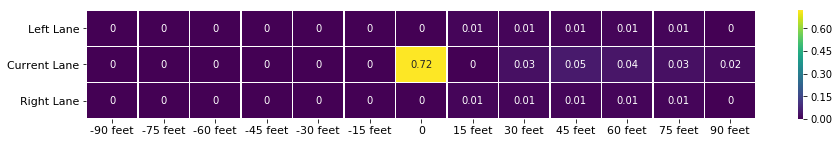

In [155]:
fig, ax = plt.subplots(figsize = (15, 2))
sns.heatmap(nbr_attention_ds, annot=True, fmt="g", cmap='viridis', linewidths = 0.30)
objects = ('-90 feet', '-75 feet', '-60 feet', '-45 feet', '-30 feet', '-15 feet', '0', '15 feet', '30 feet', '45 feet', '60 feet', '75 feet', '90 feet')#, '5 - 6','6 - 7') x_pos = [0, 2.5, 5, 7.5, 10, 12.5, 15]
x_pos = [i + 0.5 for i in range(13)] 
plt.xticks(x_pos, objects, fontsize = 11)
y_pos = [i + 0.5 for i in range(3)]
objects = ['Left Lane', 'Current Lane', 'Right Lane'] # need to double check the left, current, right order!
plt.yticks(y_pos, objects, rotation = 0, fontsize = 11)
plt.show()

In [161]:
nbr_loc = pd.read_csv('../data/trajectory/nbr_location.csv')
nbr_loc = nbr_loc[nbr_loc.columns[1:]]
nbr_loc.shape

(1505756, 39)

In [162]:
nbr_loc = np.reshape(nbr_loc.values, [-1, 13, 3])

In [163]:
nbr_loc = np.sum(nbr_loc, 0) # sum by first dimension
nbr_loc

array([[147764, 182269, 149434],
       [300572, 377771, 302293],
       [305682, 407442, 305376],
       [308088, 414785, 311258],
       [314879, 291149, 316995],
       [311411,  44034, 312920],
       [315060,   7718, 314903],
       [313704,  43955, 311893],
       [317845, 292420, 315395],
       [311763, 415915, 308392],
       [306271, 408401, 306369],
       [303112, 378661, 301253],
       [149743, 182644, 148274]])

In [164]:
nbr_loc = nbr_loc.T

In [165]:
nbr_loc

array([[147764, 300572, 305682, 308088, 314879, 311411, 315060, 313704,
        317845, 311763, 306271, 303112, 149743],
       [182269, 377771, 407442, 414785, 291149,  44034,   7718,  43955,
        292420, 415915, 408401, 378661, 182644],
       [149434, 302293, 305376, 311258, 316995, 312920, 314903, 311893,
        315395, 308392, 306369, 301253, 148274]])

In [2]:
D = scp.loadmat('/home/lei/workspace/data/trajectory/TestSet.mat')['traj']

In [3]:
# 1-dataset ID, 2-vehicle ID, 3-frame id, 4-local x, 5-local y, 6-lane id
# 7-lateral move 8-longitunal move 
# 9-21 neighbor vehicles from back -90 feet to front 90 feet at left lane
# 22-34 ...at middle lane
# 35-47 ...at right lane
df_ts = pd.DataFrame(D)
df_ts.shape

(1505756, 47)

In [49]:
df_ts.iloc[0,8:].values

array([   0.,    0.,    0.,    0.,    0.,    0.,    0.,    0., 2486.,
          0.,    0., 2483.,    0.,    0.,    0.,    0., 2485.,    0.,
          0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
          0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
          0.,    0.,    0.], dtype=float32)

In [53]:
df_ts.iloc[0,8:].values.reshape(3, 13).T.reshape(1, 39)

array([[   0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0., 2485.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0., 2486.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0., 2483.,    0.,    0.,
           0.,    0.,    0.]], dtype=float32)

In [27]:
wt_ha['vehID'] = vehid
wt_ha['time_step'] = T
wt_ha['dsID'] = dsID

In [12]:
dsID1 = pd.read_csv('../data/trajectory_data/us101-0750-0805.csv',  header = None)
dsID2 = pd.read_csv('../data/trajectory_data/us101-0805-0820.csv',  header = None)
dsID3 = pd.read_csv('../data/trajectory_data/us101-0820-0835.csv', header = None)
dsID4 = pd.read_csv('../data/trajectory_data/i80-1600-1615.csv', header = None)
dsID5 = pd.read_csv('../data/trajectory_data/i80-1700-1715.csv',  header = None)
dsID6 = pd.read_csv('../data/trajectory_data/i80-1715-1730.csv',  header = None)
# first column veh ID
# 11 column veh class 1 = motorcycle, 2 = auto, 3 = truck.

In [13]:
dsID1 = dsID1[dsID1.columns[[0, 10]]].drop_duplicates(keep='first').reset_index(drop = True)
dsID1['dsID'] = 1
dsID2 = dsID2[dsID2.columns[[0, 10]]].drop_duplicates(keep='first').reset_index(drop = True)
dsID2['dsID'] = 2
dsID3 = dsID3[dsID3.columns[[0, 10]]].drop_duplicates(keep='first').reset_index(drop = True)
dsID3['dsID'] = 3
dsID4 = dsID4[dsID4.columns[[0, 10]]].drop_duplicates(keep='first').reset_index(drop = True)
dsID4['dsID'] = 4
dsID5 = dsID5[dsID5.columns[[0, 10]]].drop_duplicates(keep='first').reset_index(drop = True)
dsID5['dsID'] = 5
dsID6 = dsID6[dsID6.columns[[0, 10]]].drop_duplicates(keep='first').reset_index(drop = True)
dsID6['dsID'] = 6

In [15]:
veh_class = pd.concat([dsID1, dsID2, dsID3, dsID4, dsID5, dsID6])
veh_class.columns = ['vehID', 'veh_class', 'dsID']
veh_class.to_csv('veh_class.csv')

In [26]:
tem = dsID1[dsID1.iloc[:, 0] == 2]
tem[tem.columns[10]][0]

2

# comparison of passenger vehicle and trucks (as ego-vehicles)

In [22]:
veh_class = pd.read_csv('veh_class.csv')
veh_class = veh_class[veh_class.columns[1:]]
veh_class.head()

,vehID,veh_class,dsID
0,2,2,1
1,4,2,1
2,5,2,1
3,6,2,1
4,8,2,1


In [29]:
wt_ha.head()

,0,1,2,3,4,5,6,7,8,9,...,33,34,35,36,37,38,39,vehID,time_step,dsID
0,0.000834,0.000834,0.000834,0.000834,0.000834,0.000834,0.000834,0.000834,0.000834,0.000834,...,0.008843,0.000834,0.009992,0.000834,0.090965,0.000834,0.734179,2670,7371.0,5
1,0.001146,0.001146,0.001146,0.001146,0.001146,0.000681,0.001146,0.001146,0.001146,0.001146,...,0.001146,0.001146,0.047168,0.001146,0.001146,0.001146,0.663651,1899,9232.0,3
2,0.000946,0.000946,0.000946,0.000946,0.000946,0.000946,0.000946,0.000946,0.000946,0.006163,...,0.007845,0.000946,0.000946,0.000946,0.097730,0.000946,0.663265,2460,10629.0,6
3,0.001147,0.002996,0.001147,0.001147,0.001147,0.000604,0.010161,0.001147,0.001147,0.001147,...,0.011851,0.016419,0.001147,0.001147,0.001147,0.001147,0.861662,2817,7909.0,4
4,0.001849,0.001849,0.001849,0.007652,0.001849,0.001849,0.001849,0.001849,0.001849,0.001849,...,0.001849,0.001849,0.001849,0.001849,0.001849,0.001849,0.596644,2782,7625.0,4


In [31]:
new_wt_ha = pd.merge(wt_ha, veh_class, how='left', on=['dsID','vehID'])
new_wt_ha.head()

,0,1,2,3,4,5,6,7,8,9,...,34,35,36,37,38,39,vehID,time_step,dsID,veh_class
0,0.000834,0.000834,0.000834,0.000834,0.000834,0.000834,0.000834,0.000834,0.000834,0.000834,...,0.000834,0.009992,0.000834,0.090965,0.000834,0.734179,2670,7371.0,5,2
1,0.001146,0.001146,0.001146,0.001146,0.001146,0.000681,0.001146,0.001146,0.001146,0.001146,...,0.001146,0.047168,0.001146,0.001146,0.001146,0.663651,1899,9232.0,3,2
2,0.000946,0.000946,0.000946,0.000946,0.000946,0.000946,0.000946,0.000946,0.000946,0.006163,...,0.000946,0.000946,0.000946,0.097730,0.000946,0.663265,2460,10629.0,6,2
3,0.001147,0.002996,0.001147,0.001147,0.001147,0.000604,0.010161,0.001147,0.001147,0.001147,...,0.016419,0.001147,0.001147,0.001147,0.001147,0.861662,2817,7909.0,4,2
4,0.001849,0.001849,0.001849,0.007652,0.001849,0.001849,0.001849,0.001849,0.001849,0.001849,...,0.001849,0.001849,0.001849,0.001849,0.001849,0.596644,2782,7625.0,4,2
5,0.001201,0.001201,0.001201,0.001201,0.001201,0.001201,0.007995,0.001776,0.001201,0.001201,...,0.001201,0.001201,0.001201,0.001201,0.001201,0.830392,2842,9289.0,5,2
6,0.001302,0.001302,0.000727,0.001302,0.002550,0.001302,0.001302,0.001302,0.001491,0.001302,...,0.141489,0.001302,0.001302,0.001302,0.001302,0.580794,1778,9138.0,3,2
7,0.001417,0.001417,0.001417,0.003560,0.001417,0.001417,0.001417,0.001417,0.001417,0.001417,...,0.001417,0.001417,0.001417,0.001417,0.001417,0.744830,2466,9190.0,2,2
8,0.000800,0.000800,0.000800,0.000800,0.000938,0.000800,0.000800,0.000800,0.000800,0.000800,...,0.000800,0.000800,0.009905,0.000800,0.000800,0.706397,2662,8849.0,5,2
9,0.000871,0.000871,0.000871,0.005232,0.001739,0.000871,0.000871,0.000871,0.000762,0.006128,...,0.093748,0.000871,0.006265,0.000871,0.000871,0.557048,2531,7966.0,5,2


In [33]:
new_wt_ha_ave = new_wt_ha.groupby(['veh_class']).mean().reset_index()
new_wt_ha_ave

,veh_class,0,1,2,3,4,5,6,7,8,...,33,34,35,36,37,38,39,vehID,time_step,dsID
0,1,0.002316,0.002193,0.002130,0.002487,0.002268,0.002070,0.002587,0.002423,0.002098,...,0.004964,0.020804,0.007886,0.003672,0.010091,0.004907,0.749837,2618.175287,7101.491190,3.814937
1,2,0.001749,0.001353,0.001290,0.002309,0.001553,0.001238,0.002514,0.001846,0.001247,...,0.005177,0.031408,0.005398,0.002991,0.013920,0.003219,0.721384,2536.616444,8517.295835,3.339774
2,3,0.002042,0.001513,0.001444,0.002726,0.001653,0.001386,0.002892,0.001869,0.001399,...,0.006296,0.020678,0.005433,0.003613,0.011569,0.003376,0.795321,2550.065341,8486.725727,3.651401


In [37]:
new_wt_ha_ave.iloc[0,40]

0.7498371650221642

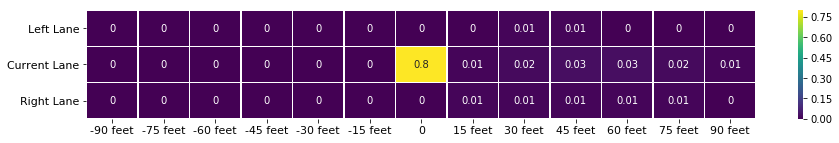

In [39]:
i = 0  #1 = motorcycle, 2 = auto, 3 = truck.
nbr_attention_ds = new_wt_ha_ave.iloc[i,1:40].values
nbr_attention_ds = np.reshape(nbr_attention_ds, [13, 3]) # top rows are from the back to the front, 
nbr_attention_ds[6, 1] = new_wt_ha_ave.iloc[i, 40]
nbr_attention_ds = np.round(nbr_attention_ds, 2)

nbr_attention_ds = nbr_attention_ds / np.sum(nbr_attention_ds) # renormalize
nbr_attention_ds = np.round(nbr_attention_ds, 2)
nbr_attention_ds = nbr_attention_ds.T

fig, ax = plt.subplots(figsize = (15, 2))
sns.heatmap(nbr_attention_ds, annot=True, fmt="g", cmap='viridis', linewidths = 0.30)
objects = ('-90 feet', '-75 feet', '-60 feet', '-45 feet', '-30 feet', '-15 feet', '0', '15 feet', '30 feet', '45 feet', '60 feet', '75 feet', '90 feet')#, '5 - 6','6 - 7') x_pos = [0, 2.5, 5, 7.5, 10, 12.5, 15]
x_pos = [i + 0.5 for i in range(13)] 
plt.xticks(x_pos, objects, fontsize = 11)
y_pos = [i + 0.5 for i in range(3)]
objects = ['Left Lane', 'Current Lane', 'Right Lane']
plt.yticks(y_pos, objects, rotation = 0, fontsize = 11)
plt.show()

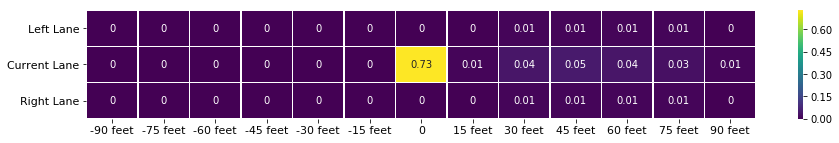

In [40]:
i = 1  #1 = motorcycle, 2 = auto, 3 = truck.
nbr_attention_ds = new_wt_ha_ave.iloc[i,1:40].values
nbr_attention_ds = np.reshape(nbr_attention_ds, [13, 3]) # top rows are from the back to the front, 
nbr_attention_ds[6, 1] = new_wt_ha_ave.iloc[i, 40]
nbr_attention_ds = np.round(nbr_attention_ds, 2)

nbr_attention_ds = nbr_attention_ds / np.sum(nbr_attention_ds) # renormalize
nbr_attention_ds = np.round(nbr_attention_ds, 2)
nbr_attention_ds = nbr_attention_ds.T

fig, ax = plt.subplots(figsize = (15, 2))
sns.heatmap(nbr_attention_ds, annot=True, fmt="g", cmap='viridis', linewidths = 0.30)
objects = ('-90 feet', '-75 feet', '-60 feet', '-45 feet', '-30 feet', '-15 feet', '0', '15 feet', '30 feet', '45 feet', '60 feet', '75 feet', '90 feet')#, '5 - 6','6 - 7') x_pos = [0, 2.5, 5, 7.5, 10, 12.5, 15]
x_pos = [i + 0.5 for i in range(13)] 
plt.xticks(x_pos, objects, fontsize = 11)
y_pos = [i + 0.5 for i in range(3)]
objects = ['Left Lane', 'Current Lane', 'Right Lane']
plt.yticks(y_pos, objects, rotation = 0, fontsize = 11)
plt.show()

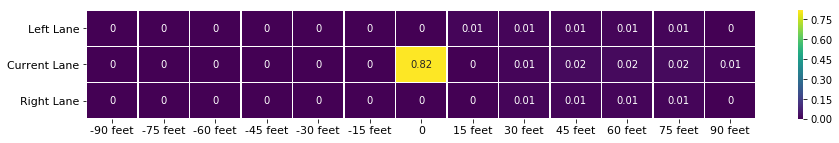

In [41]:
i = 2  #1 = motorcycle, 2 = auto, 3 = truck.
nbr_attention_ds = new_wt_ha_ave.iloc[i,1:40].values
nbr_attention_ds = np.reshape(nbr_attention_ds, [13, 3]) # top rows are from the back to the front, 
nbr_attention_ds[6, 1] = new_wt_ha_ave.iloc[i, 40]
nbr_attention_ds = np.round(nbr_attention_ds, 2)

nbr_attention_ds = nbr_attention_ds / np.sum(nbr_attention_ds) # renormalize
nbr_attention_ds = np.round(nbr_attention_ds, 2)
nbr_attention_ds = nbr_attention_ds.T

fig, ax = plt.subplots(figsize = (15, 2))
sns.heatmap(nbr_attention_ds, annot=True, fmt="g", cmap='viridis', linewidths = 0.30)
objects = ('-90 feet', '-75 feet', '-60 feet', '-45 feet', '-30 feet', '-15 feet', '0', '15 feet', '30 feet', '45 feet', '60 feet', '75 feet', '90 feet')#, '5 - 6','6 - 7') x_pos = [0, 2.5, 5, 7.5, 10, 12.5, 15]
x_pos = [i + 0.5 for i in range(13)] 
plt.xticks(x_pos, objects, fontsize = 11)
y_pos = [i + 0.5 for i in range(3)]
objects = ['Left Lane', 'Current Lane', 'Right Lane']
plt.yticks(y_pos, objects, rotation = 0, fontsize = 11)
plt.show()

# attention received by vehicle_class

In [4]:
res = []
res_ds = []
for i in range(df_ts.shape[0]):
    res_ds.append([int(df_ts.iloc[i, 0])]*39)
    tem = df_ts.iloc[i,8:].values.reshape(3, 13).T.reshape(39, 1) # cong hengxiang jishu dao zongxiang jishu 
    res.append(tem)

In [9]:
res_ds = np.concatenate(res_ds, 0)

In [11]:
res_ds.shape

(58724484,)

In [12]:
res = np.concatenate(res, 0)

In [13]:
res.shape

(58724484, 1)

In [16]:
attention = wt_ha.iloc[:, 0:39].values.reshape([-1, 1])
attention.shape

(58724484, 1)

In [17]:
res_atten = pd.DataFrame(res)
res_atten.head()

,0
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0


In [19]:
res_atten['dsID'] = res_ds
res_atten['attention'] = attention

In [21]:
res_atten.columns = ['vehID', 'dsID', 'attention']

In [23]:
new_res_atten = pd.merge(res_atten, veh_class, how='left', on=['dsID','vehID'])
new_res_atten.head()

,vehID,dsID,attention,veh_class
0,0.0,1,0.000834,NaN
1,0.0,1,0.000834,NaN
2,0.0,1,0.000834,NaN
3,0.0,1,0.000834,NaN
4,0.0,1,0.000834,NaN


In [26]:
new_res_atten_ave = new_res_atten.groupby(['veh_class'])['attention'].mean()
new_res_atten_ave

veh_class
1.0    0.008163
2.0    0.008350
3.0    0.006112
Name: attention, dtype: float64

In [29]:
new_res_atten_ave = new_res_atten.groupby(['veh_class'])['attention'].std()
new_res_atten_ave

veh_class
1.0    0.029967
2.0    0.030082
3.0    0.022192
Name: attention, dtype: float64

In [28]:
new_res_atten_ave = new_res_atten.groupby(['veh_class'])['attention'].count()
new_res_atten_ave

veh_class
1.0       40813
2.0    11253428
3.0      286487
Name: attention, dtype: int64

In [60]:
# only compare the accumulated attention when passenger vehs/trucks are in the front of the current lane (25 is the index)
batch = new_res_atten.shape[0] // 39

final_res = []
#last = 0
for i in range(batch):
    #nbr_b = i // 39
    #if nbr_b != last: # avoid the duplicates, for example, 10, 24, 33, the same neighbor row will be added three times
    final_res.append(new_res_atten.iloc[[i*39 + d for d in [22, 25, 28, 31, 34, 37]],]) # the front of the current lane
    #last = nbr_b

In [61]:
final_res = pd.concat(final_res).reset_index(drop = True)
final_res.head()

,vehID,dsID,attention,veh_class
0,0.0,1,0.000834,NaN
1,0.0,1,0.000834,NaN
2,0.0,1,0.000834,NaN
3,0.0,1,0.117416,NaN
4,0.0,1,0.000834,NaN


In [63]:
final_res['grid_index'] = [22, 25, 28, 31, 34, 37] * 1505756

In [65]:
final_res_ave = final_res.groupby(['veh_class', 'grid_index'])['attention'].mean().reset_index()
final_res_ave

,veh_class,grid_index,attention
0,1.0,22,0.005031
1,1.0,25,0.038062
2,1.0,28,0.048090
3,1.0,31,0.041115
4,1.0,34,0.031185
5,1.0,37,0.013274
6,2.0,22,0.006696
7,2.0,25,0.036314
8,2.0,28,0.045570
9,2.0,31,0.040064


In [66]:
final_res_ave = final_res.groupby(['veh_class', 'grid_index'])['attention'].count().reset_index()
final_res_ave

,veh_class,grid_index,attention
0,1.0,22,740
1,1.0,25,1810
2,1.0,28,1076
3,1.0,31,1285
4,1.0,34,1303
5,1.0,37,582
6,2.0,22,45873
7,2.0,25,306334
8,2.0,28,433286
9,2.0,31,423447


# free vs congestion

In [127]:
zeros_df = df_ts.iloc[:, 8:]
zero_count = (zeros_df == 0).astype(int).sum(axis=1)
wt_ha['neighbor_num'] = 39 - zero_count

In [128]:
wt_ha['neighbor_num'].describe()

count    1.505756e+06
mean     7.690973e+00
std      3.415456e+00
min      0.000000e+00
25%      5.000000e+00
50%      7.000000e+00
75%      1.000000e+01
max      2.100000e+01
Name: neighbor_num, dtype: float64

In [129]:
wt_ha['tf_con'] = 0
wt_ha.loc[wt_ha['neighbor_num'] <= 7, 'tf_con'] = 1
wt_ha.loc[(wt_ha['neighbor_num'] > 7) & (wt_ha['neighbor_num'] <=15), 'tf_con'] = 2
wt_ha.loc[wt_ha['neighbor_num'] >15, 'tf_con'] = 3
wt_ha.head()

,0,1,2,3,4,5,6,7,8,9,...,32,33,34,35,36,37,38,39,neighbor_num,tf_con
0,0.000834,0.000834,0.000834,0.000834,0.000834,0.000834,0.000834,0.000834,0.000834,0.000834,...,0.000834,0.008843,0.000834,0.009992,0.000834,0.090965,0.000834,0.734179,3,1
1,0.001146,0.001146,0.001146,0.001146,0.001146,0.000681,0.001146,0.001146,0.001146,0.001146,...,0.001146,0.001146,0.001146,0.047168,0.001146,0.001146,0.001146,0.663651,3,1
2,0.000946,0.000946,0.000946,0.000946,0.000946,0.000946,0.000946,0.000946,0.000946,0.006163,...,0.000946,0.007845,0.000946,0.000946,0.000946,0.097730,0.000946,0.663265,3,1
3,0.001147,0.002996,0.001147,0.001147,0.001147,0.000604,0.010161,0.001147,0.001147,0.001147,...,0.001147,0.011851,0.016419,0.001147,0.001147,0.001147,0.001147,0.861662,3,1
4,0.001849,0.001849,0.001849,0.007652,0.001849,0.001849,0.001849,0.001849,0.001849,0.001849,...,0.001849,0.001849,0.001849,0.001849,0.001849,0.001849,0.001849,0.596644,3,1


In [130]:
wt_ha_ave = wt_ha.groupby(['tf_con']).mean().reset_index()
wt_ha_ave

,tf_con,0,1,2,3,4,5,6,7,8,...,31,32,33,34,35,36,37,38,39,neighbor_num
0,1,0.001758,0.001362,0.001299,0.002321,0.001560,0.001247,0.002522,0.001850,0.001256,...,0.040171,0.005952,0.005188,0.030982,0.005411,0.003010,0.013824,0.003226,0.723630,5.173391
1,2,0.001762,0.001362,0.001299,0.002321,0.001560,0.001247,0.002530,0.001850,0.001257,...,0.039956,0.005981,0.005227,0.031148,0.005414,0.003014,0.013849,0.003241,0.723510,10.331612
2,3,0.001774,0.001363,0.001301,0.002321,0.001562,0.001248,0.002498,0.001851,0.001259,...,0.040164,0.005970,0.005227,0.030902,0.005458,0.003038,0.013764,0.003256,0.723634,16.716877


In [131]:
i = 0
nbr_attention_ds = wt_ha_ave.iloc[i,1:40].values
nbr_attention_ds = np.reshape(nbr_attention_ds, [13, 3]) # top rows are from the back to the front, 
nbr_attention_ds[6, 1] = wt_ha_ave.iloc[i, 40]
nbr_attention_ds

array([[0.00175827, 0.00136198, 0.00129878],
       [0.00232126, 0.0015599 , 0.00124733],
       [0.00252159, 0.00184967, 0.00125579],
       [0.00270208, 0.00213547, 0.00129111],
       [0.00279783, 0.00235554, 0.00134884],
       [0.00291608, 0.00169679, 0.00142377],
       [0.00295312, 0.72362951, 0.0017286 ],
       [0.00463876, 0.00675272, 0.00474387],
       [0.00615905, 0.03615287, 0.00639023],
       [0.00601181, 0.04557316, 0.00625947],
       [0.00574797, 0.04017136, 0.00595229],
       [0.00518842, 0.03098155, 0.00541117],
       [0.00301018, 0.01382367, 0.0032261 ]])

In [132]:
nbr_attention_ds = np.round(nbr_attention_ds, 2)
nbr_attention_ds

array([[0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  ],
       [0.  , 0.72, 0.  ],
       [0.  , 0.01, 0.  ],
       [0.01, 0.04, 0.01],
       [0.01, 0.05, 0.01],
       [0.01, 0.04, 0.01],
       [0.01, 0.03, 0.01],
       [0.  , 0.01, 0.  ]])

In [133]:
nbr_attention_ds = nbr_attention_ds / np.sum(nbr_attention_ds) # renormalize
nbr_attention_ds = np.round(nbr_attention_ds, 2)
nbr_attention_ds = nbr_attention_ds.T

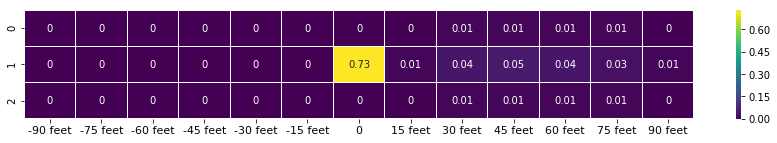

In [134]:
fig, ax = plt.subplots(figsize = (15, 2))
sns.heatmap(nbr_attention_ds, annot=True, fmt="g", cmap='viridis', linewidths = 0.30)
objects = ('-90 feet', '-75 feet', '-60 feet', '-45 feet', '-30 feet', '-15 feet', '0', '15 feet', '30 feet', '45 feet', '60 feet', '75 feet', '90 feet')#, '5 - 6','6 - 7') x_pos = [0, 2.5, 5, 7.5, 10, 12.5, 15]
x_pos = [i + 0.5 for i in range(13)] 
plt.xticks(x_pos, objects, fontsize = 11)
#y_pos = [i + 0.5 for i in range(3)]
#objects = ['Left Lane', 'Current Lane', 'Right Lane'] # need to double check the left, current, right order!
#plt.yticks(y_pos, objects, rotation = 0, fontsize = 11)
plt.show()

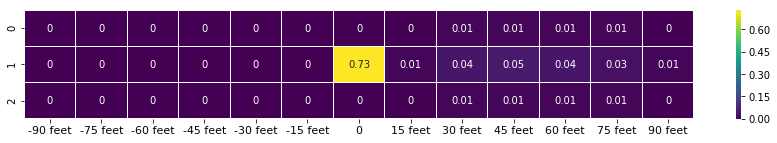

In [135]:
i = 1
nbr_attention_ds = wt_ha_ave.iloc[i,1:40].values
nbr_attention_ds = np.reshape(nbr_attention_ds, [13, 3]) # top rows are from the back to the front, 
nbr_attention_ds[6, 1] = wt_ha_ave.iloc[i, 40]
nbr_attention_ds

nbr_attention_ds = np.round(nbr_attention_ds, 2)
nbr_attention_ds

nbr_attention_ds = nbr_attention_ds / np.sum(nbr_attention_ds) # renormalize
nbr_attention_ds = np.round(nbr_attention_ds, 2)
nbr_attention_ds = nbr_attention_ds.T

fig, ax = plt.subplots(figsize = (15, 2))
sns.heatmap(nbr_attention_ds, annot=True, fmt="g", cmap='viridis', linewidths = 0.30)
objects = ('-90 feet', '-75 feet', '-60 feet', '-45 feet', '-30 feet', '-15 feet', '0', '15 feet', '30 feet', '45 feet', '60 feet', '75 feet', '90 feet')#, '5 - 6','6 - 7') x_pos = [0, 2.5, 5, 7.5, 10, 12.5, 15]
x_pos = [i + 0.5 for i in range(13)] 
plt.xticks(x_pos, objects, fontsize = 11)
#y_pos = [i + 0.5 for i in range(3)]
#objects = ['Left Lane', 'Current Lane', 'Right Lane'] # need to double check the left, current, right order!
#plt.yticks(y_pos, objects, rotation = 0, fontsize = 11)
plt.show()

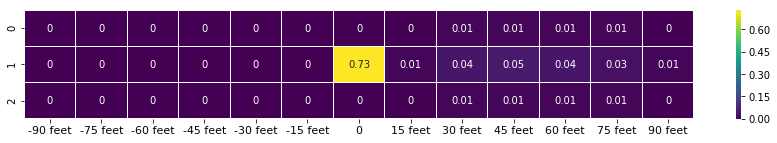

In [136]:
i = 2
nbr_attention_ds = wt_ha_ave.iloc[i,1:40].values
nbr_attention_ds = np.reshape(nbr_attention_ds, [13, 3]) # top rows are from the back to the front, 
nbr_attention_ds[6, 1] = wt_ha_ave.iloc[i, 40]
nbr_attention_ds

nbr_attention_ds = np.round(nbr_attention_ds, 2)
nbr_attention_ds

nbr_attention_ds = nbr_attention_ds / np.sum(nbr_attention_ds) # renormalize
nbr_attention_ds = np.round(nbr_attention_ds, 2)
nbr_attention_ds = nbr_attention_ds.T

fig, ax = plt.subplots(figsize = (15, 2))
sns.heatmap(nbr_attention_ds, annot=True, fmt="g", cmap='viridis', linewidths = 0.30)
objects = ('-90 feet', '-75 feet', '-60 feet', '-45 feet', '-30 feet', '-15 feet', '0', '15 feet', '30 feet', '45 feet', '60 feet', '75 feet', '90 feet')#, '5 - 6','6 - 7') x_pos = [0, 2.5, 5, 7.5, 10, 12.5, 15]
x_pos = [i + 0.5 for i in range(13)] 
plt.xticks(x_pos, objects, fontsize = 11)
#y_pos = [i + 0.5 for i in range(3)]
#objects = ['Left Lane', 'Current Lane', 'Right Lane'] # need to double check the left, current, right order!
#plt.yticks(y_pos, objects, rotation = 0, fontsize = 11)
plt.show()

In [ ]:
# based on nbr_loc sum by row, we know whether they are in congestion or not
# visualize by lane 
# large prediction error 
# less braking vs frequent braking
# vehicle class